
Diabetes Health Indicators Dataset

The purpose of this code notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The dataset is from kaggle. This project will be using only the diabetes_binary_5050split_health_indictors_BRFSS2015.csv. This is a clean dataset of 70692 survey repsonses to CDC's BRFSS2015. It has a 50-50 split of respondents with no diabetes and with either predediabetes or diabetes. The target variable Diabetes_binnary has 2 classs. 0 is for no diabetes and 1 is for prediabetes or diabetes.It has 21 feature variables and is balanced.

Based on the diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.

Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease (not in strict order of importance). The following are the selected subset of features from BRFSS2015.

    diabetes binary (0 = no diabetes; 1 = prediabetes/diabetes)
    high blood pressure (0 = no high BP; 1 = high BP)
    high cholesterol (0 = no high cholesterol; 1 = high cholesterol)
    cholesterol check (0 = no choesterol check in 5 years; 1 = yes cholesterol check in 5 years)
    BMI (body mass index)
    smoker (smoke at least 100 cigarettes in entire life; 5 packs = 100 cigarettes; 0 = no; 1 = yes)
    stroke (ever toled has a stroke; 0 = no; 1 = yes)
    heart disease or attack (coronary heart disease(CHD) or myocardial infarction(MI); o = no; 1 = yes)
    physical activity (in past 30 days not including job; 0 = no; 1 = yes))
    fruits (consumed 1 or more times per day; 0 = no; 1 = yes)
    veggies (consumed 1 or more times per day; 0 = no; 1 = yes)
    heavy alcohol consumption (adult men =>14 drinks per week; adult women =>7 drinks per week; 0 = no; 1 = yes)
    any healthcare (any kind of healthcare coverage including health insurance, prepaid plans (HMO etc); 0 = no; 1 = yes)
    no doctor because of cost (past 12 months when needed to see doctor but could not because of cost?; 0 = no; 1 = yes)
    general health (is general health 5 scale; 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor)
    mental health (days of poor mental health 1-30 days)
    physical health (physical illness or injury days in past 30 days scale of 1-30)
    difficulty walking (have serious difficulty walking or climbing stairs? 0 = no; 1 = yes)
    sex (0 = female; 1 = male)
    age (14 level age category; 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 13 = >80; 14 = not know/not sure/refused/missing)
    education (scale 1-8; 1 = never attended school or only kindergarten; 2 = elementary; 3 = some high school; 4 = high school graduate; 5 = some college; 6 = college graduate; 9 = refused)
    income (scale 1-8; 1 = <10K; 2 = <15K; 3 = <20K; 4 = <25K; 5 = <35K; 6 = <50K; 7 <75K; 8 = >or more 75K; 77 = not know/not sure; 99 = refused)
  
The selected subset of Features (columns from the dataset) from BRFSS 2015 was further investigated for additional information in order to understand the meaning of the data gathered from the BRFSS 2015 codebook from the survey.

Additional information about the BRFSS 2015 codebook and relevant paper are as follows:

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.htm

The selected features from the BRFSS 2015 dataset are:

Response Variable / Dependent Variable:

    (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.) --> DIABETE3






In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import glob
import random
random.seed(1)
import matplotlib.pyplot as plt

In [2]:
#read in the dataset (select 2015)

brfss2015_dataset = pd.read_csv('BRFSSdata/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
#call the  info method on brfss2015_dataset to see a summary of the data and the datatypes present
brfss2015_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

These are floats and could be integers since the data are already categorized

In [4]:
#find out the shape of the data to determine the number of rows and columns
brfss2015_dataset.shape

(70692, 22)

In [5]:
#call in the head method on the dataset to print the first several rows and check the state of the data
brfss2015_dataset.head().T

,0,1,2,3,4
Diabetes_binary,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,1.0,0.0,1.0,0.0
HighChol,0.0,1.0,0.0,1.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,26.0,26.0,26.0,28.0,29.0
Smoker,0.0,1.0,0.0,1.0,1.0
Stroke,0.0,1.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,1.0,0.0,1.0,1.0,1.0
Fruits,0.0,1.0,1.0,1.0,1.0


In [6]:
# print out the columns of the datatset
brfss2015_dataset.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
#find what datatypes the data has
brfss2015_dataset.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [8]:
#call the describe method gives you a descriptive statistics summary of the data; 
#easier to view since less columns for the stats data call in transpose method
brfss2015_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [9]:
brfss2015_dataset.isnull().values.any()

False

In [10]:
#fin out the number of missing values using .isnull() in each of the column
#find out the percentages using mean 
#present a talbe with column names of count and percentages
missing =pd.concat([brfss2015_dataset.isnull().sum(), 100* brfss2015_dataset.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count', '%'])

,count,%
Diabetes_binary,0,0.0
HighBP,0,0.0
HighChol,0,0.0
CholCheck,0,0.0
BMI,0,0.0
Smoker,0,0.0
Stroke,0,0.0
HeartDiseaseorAttack,0,0.0
PhysActivity,0,0.0
Fruits,0,0.0


There is no missing data for any of the columns

In [11]:
#check the head of the transposed dataframe
brfss2015_dataset_T = brfss2015_dataset.T
brfss2015_dataset.T.head()

,0,1,2,3,4,5,6,7,8,9,...,70682,70683,70684,70685,70686,70687,70688,70689,70690,70691
Diabetes_binary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
HighBP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
HighChol,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
CholCheck,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,26.0,26.0,26.0,28.0,29.0,18.0,26.0,31.0,32.0,27.0,...,37.0,28.0,27.0,38.0,27.0,37.0,29.0,25.0,18.0,25.0


In [12]:
brfss2015_dataset.nunique

<bound method DataFrame.nunique of        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivit

In [13]:
#total number of male = 1; female=0; diabetes =2
brfss2015_dataset.value_counts(subset='Diabetes_binary')


Diabetes_binary
0.0    35346
1.0    35346
dtype: int64

In [14]:
brfss2015_dataset.value_counts(subset='Age')

Age
10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
dtype: int64

In [15]:
brfss2015_dataset.value_counts(subset='Sex')

Sex
0.0    38386
1.0    32306
dtype: int64

the data above shows there are equal number of male and female patients with diabetes and without diabetes.
there are more females are who diabetic than males; the age group of 65-69 has the highest count and age groupof 18-24 has ths least count.

In [17]:
brfss2015_dataset['Diabetes_binary'].unique()

array([0., 1.])

In [18]:
brfss2015_dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

No duplicates found in the dataset

NaN values are not applicable most of the values are 0 and 1 representing yes/no values

In [4]:
#use replace NaN with empty string using replace()function [df.replace(np.nan, '' or '-')]
data = brfss2015_dataset.apply(pd.value_counts).T
data.replace(np.nan, '-')

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,82.0,83.0,84.0,85.0,86.0,87.0,89.0,92.0,95.0,98.0
Diabetes_binary,35346.0,35346.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighBP,30860.0,39832.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighChol,33529.0,37163.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
CholCheck,1749.0,68943.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
BMI,-,-,-,-,-,-,-,-,-,-,...,11.0,1.0,13.0,1.0,1.0,13.0,4.0,9.0,4.0,4.0
Smoker,37094.0,33598.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Stroke,66297.0,4395.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HeartDiseaseorAttack,60243.0,10449.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
PhysActivity,20993.0,49699.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Fruits,27443.0,43249.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [20]:
brfss2015_dataset.value_counts(subset='HighBP')

HighBP
1.0    39832
0.0    30860
dtype: int64

Highest count for people with high BP

In [21]:
brfss2015_dataset.value_counts(subset='HighChol')

HighChol
1.0    37163
0.0    33529
dtype: int64

Highest count for people with high cholesterol

In [22]:
brfss2015_dataset.value_counts(subset='CholCheck')

CholCheck
1.0    68943
0.0     1749
dtype: int64

Highest count for people with who had their cholesterol check in the past 5 years

In [23]:
brfss2015_dataset.value_counts(subset='BMI')

BMI
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
86.0       1
78.0       1
74.0       1
12.0       1
Length: 80, dtype: int64

Noted BMI of 27 is in the overweight range (25.0 to <30) has the highest values count in BMI

In [24]:
brfss2015_dataset.value_counts(subset='Smoker')

Smoker
0.0    37094
1.0    33598
dtype: int64

There are more non smoker and smokers

In [25]:
brfss2015_dataset.value_counts(subset='Stroke')

Stroke
0.0    66297
1.0     4395
dtype: int64

Highest count for people who did not have stroke

In [26]:
brfss2015_dataset.value_counts(subset='HeartDiseaseorAttack')

HeartDiseaseorAttack
0.0    60243
1.0    10449
dtype: int64

Highest count for people who do not have any heart disease/attack

In [27]:
brfss2015_dataset.value_counts(subset='PhysActivity')

PhysActivity
1.0    49699
0.0    20993
dtype: int64

Big count on number of respondents who performed physical activity

In [28]:
brfss2015_dataset.value_counts(subset='Fruits')

Fruits
1.0    43249
0.0    27443
dtype: int64

Big count on number of respondents who ate 1 or more times a day

In [29]:
brfss2015_dataset.value_counts(subset='Veggies')

Veggies
1.0    55760
0.0    14932
dtype: int64

Big count on number of respondents who ate veggies 1 or more times a day

In [30]:
brfss2015_dataset.value_counts(subset='HvyAlcoholConsump')

HvyAlcoholConsump
0.0    67672
1.0     3020
dtype: int64

Bid count on respondents who did not drink any alcohol

In [31]:
brfss2015_dataset.value_counts(subset='AnyHealthcare')

AnyHealthcare
1.0    67508
0.0     3184
dtype: int64

the highest count for people with healthcare coverage

In [32]:
brfss2015_dataset.value_counts(subset='NoDocbcCost')

NoDocbcCost
0.0    64053
1.0     6639
dtype: int64

The hihgest count are people who are able to go the doctor despite cost

In [33]:
brfss2015_dataset.value_counts(subset='GenHlth')

GenHlth
3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
dtype: int64

The highest count are for people who are in good general health

In [34]:
brfss2015_dataset.value_counts(subset='MentHlth')

MentHlth
0.0     48091
30.0     4320
2.0      3267
5.0      2519
1.0      2051
3.0      1967
10.0     1924
15.0     1767
20.0     1125
4.0       981
7.0       825
25.0      425
14.0      353
6.0       288
8.0       198
12.0      130
28.0       99
21.0       84
29.0       53
18.0       42
16.0       28
9.0        28
22.0       22
17.0       18
26.0       17
27.0       17
13.0       15
23.0       13
24.0       10
11.0        8
19.0        7
dtype: int64

The biggest count on the number of days with poor mental health is 0 and the 30 days came second

In [35]:
brfss2015_dataset.value_counts(subset='PhysHlth')

PhysHlth
0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
5.0      2332
10.0     1980
15.0     1913
4.0      1376
7.0      1326
20.0     1292
14.0      802
25.0      557
6.0       447
8.0       276
21.0      229
28.0      211
12.0      205
29.0       95
9.0        55
16.0       50
18.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
dtype: int64

The biggest count on the number of days with physical illness or injury is 0 and 30 days came second

In [37]:
brfss2015_dataset.value_counts(subset='DiffWalk')

DiffWalk
0.0    52826
1.0    17866
dtype: int64

There are less people who responded to having difficulty in walking

In [38]:
brfss2015_dataset.value_counts(subset='Education')

Education
6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
dtype: int64

The highest count for education level are those who are college graduate or more

In [39]:
brfss2015_dataset.value_counts(subset='Income')

Income
8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
dtype: int64

The highest count for income where individuals earning >75K or more

In [5]:
df = pd.DataFrame(brfss2015_dataset)
df.mean()

Diabetes_binary          0.500000
HighBP                   0.563458
HighChol                 0.525703
CholCheck                0.975259
BMI                     29.856985
Smoker                   0.475273
Stroke                   0.062171
HeartDiseaseorAttack     0.147810
PhysActivity             0.703036
Fruits                   0.611795
Veggies                  0.788774
HvyAlcoholConsump        0.042721
AnyHealthcare            0.954960
NoDocbcCost              0.093914
GenHlth                  2.837082
MentHlth                 3.752037
PhysHlth                 5.810417
DiffWalk                 0.252730
Sex                      0.456997
Age                      8.584055
Education                4.920953
Income                   5.698311
dtype: float64

<AxesSubplot:ylabel='Frequency'>

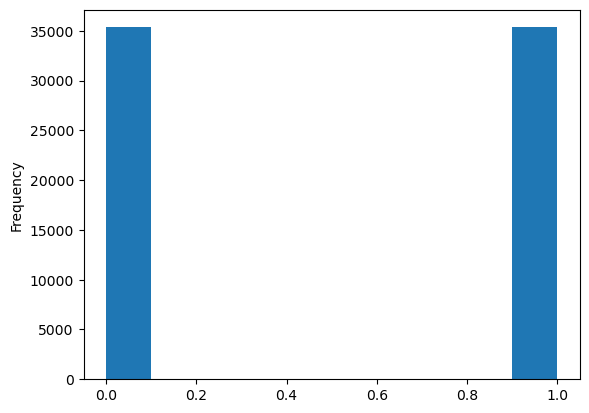

In [75]:
df['Diabetes_binary'].plot(kind='hist')

In [6]:
top5 = df.sort_values(by='Diabetes_binary', ascending=False)

#top5.plot(x='Features', y='Diabetes_binary', kind='bar', rot=5, fontsize=4)

In [66]:
df.median()

Diabetes_binary          0.5
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     29.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  3.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      9.0
Education                5.0
Income                   6.0
dtype: float64

In [68]:
df.mode().T

,0,1
Diabetes_binary,0.0,1.0
HighBP,1.0,NaN
HighChol,1.0,NaN
CholCheck,1.0,NaN
BMI,27.0,NaN
Smoker,0.0,NaN
Stroke,0.0,NaN
HeartDiseaseorAttack,0.0,NaN
PhysActivity,1.0,NaN
Fruits,1.0,NaN


In [69]:
df.std()

Diabetes_binary          0.500004
HighBP                   0.495960
HighChol                 0.499342
CholCheck                0.155336
BMI                      7.113954
Smoker                   0.499392
Stroke                   0.241468
HeartDiseaseorAttack     0.354914
PhysActivity             0.456924
Fruits                   0.487345
Veggies                  0.408181
HvyAlcoholConsump        0.202228
AnyHealthcare            0.207394
NoDocbcCost              0.291712
GenHlth                  1.113565
MentHlth                 8.155627
PhysHlth                10.062261
DiffWalk                 0.434581
Sex                      0.498151
Age                      2.852153
Education                1.029081
Income                   2.175196
dtype: float64

In [7]:
df_new = df[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck']]
df_new

,Diabetes_binary,HighBP,HighChol,CholCheck
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
70687,1.0,0.0,1.0,1.0
70688,1.0,0.0,1.0,1.0
70689,1.0,1.0,1.0,1.0
70690,1.0,1.0,1.0,1.0


<AxesSubplot:>

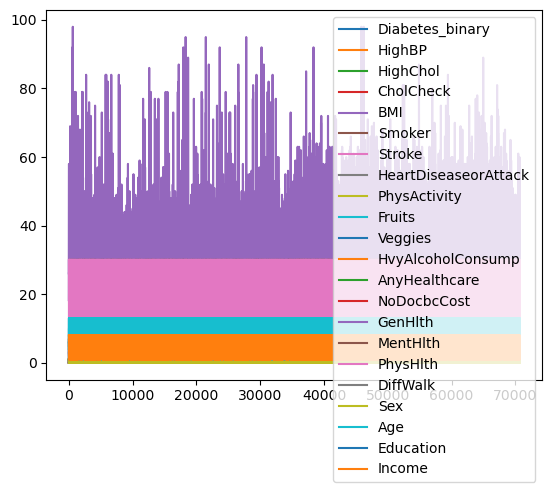

In [8]:
df.plot()

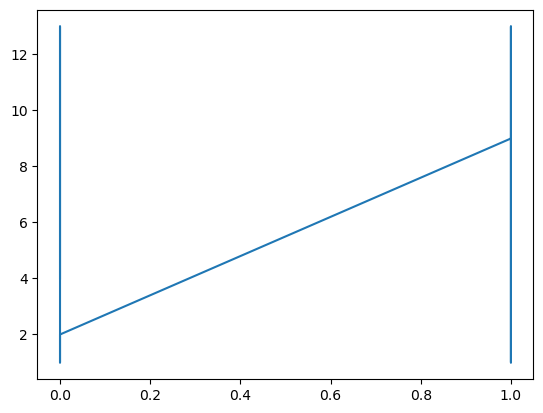

In [9]:
plt.plot(df['Diabetes_binary'], df['Age'])

In [10]:
df3=df.set_index('Diabetes_binary').groupby('Diabetes_binary').mean()
print(df3)

                   HighBP  HighChol  CholCheck        BMI    Smoker    Stroke  \
Diabetes_binary                                                                 
0.0              0.374243  0.381288   0.957336  27.769960  0.432326  0.031885   
1.0              0.752674  0.670118   0.993182  31.944011  0.518220  0.092457   

                 HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
Diabetes_binary                                                          ...   
0.0                          0.072738      0.775533  0.638149  0.821140  ...   
1.0                          0.222882      0.630538  0.585441  0.756408  ...   

                 AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  \
Diabetes_binary                                                             
0.0                   0.950150     0.081961  2.383183  3.042268  3.666355   
1.0                   0.959769     0.105868  3.290981  4.461806  7.954479   

                 DiffWalk       Sex       Age